In [1]:
import pandas as pd
import numpy as np
import csv
from sklearn.model_selection import train_test_split
import tensorflow as tf
from pre_process_2 import pre_processing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LayerNormalization, Dense, LSTM, Bidirectional, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Epoch 1/25
49/49 [==============================] - 11s 19ms/step - loss: 1.0929 - accuracy: 0.3808
Epoch 2/25
49/49 [==============================] - 1s 20ms/step - loss: 1.0908 - accuracy: 0.3769
Epoch 3/25
49/49 [==============================] - 1s 21ms/step - loss: 1.0889 - accuracy: 0.3994
Epoch 4/25
49/49 [==============================] - 1s 19ms/step - loss: 1.0866 - accuracy: 0.3942
Epoch 5/25
49/49 [==============================] - 1s 21ms/step - loss: 1.0850 - accuracy: 0.4000
Epoch 6/25
49/49 [==============================] - 1s 21ms/step - loss: 1.0863 - accuracy: 0.4109
Epoch 7/25
49/49 [==============================] - 1s 20ms/step - loss: 1.0869 - accuracy: 0.4058
Epoch 8/25
49/49 [==============================] - 1s 18ms/step - loss: 1.0842 - accuracy: 0.3994
Epoch 9/25
49/49 [==============================] - 1s 19ms/step - loss: 1.0823 - accuracy: 0.4071
Epoch 10/25
49/49 [==============================] - 1s 21ms/step - loss: 1.0826 - accuracy: 0.4013
Epoch 11

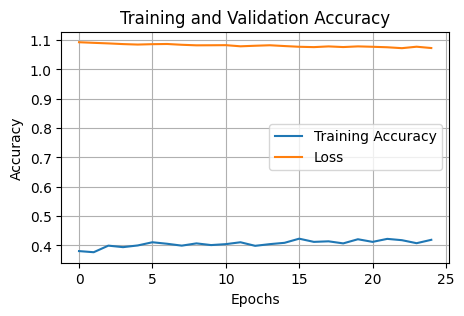

13/13 [==============================] - 2s 7ms/step


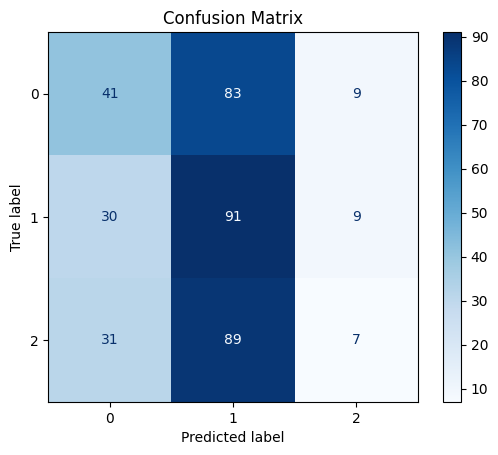

Epoch 1/25
49/49 [==============================] - 12s 44ms/step - loss: 1.0958 - accuracy: 0.3763
Epoch 2/25
49/49 [==============================] - 2s 45ms/step - loss: 1.0908 - accuracy: 0.3853
Epoch 3/25
49/49 [==============================] - 2s 44ms/step - loss: 1.0900 - accuracy: 0.3981
Epoch 4/25
49/49 [==============================] - 2s 42ms/step - loss: 1.0841 - accuracy: 0.4000
Epoch 5/25
49/49 [==============================] - 2s 45ms/step - loss: 1.0868 - accuracy: 0.4013
Epoch 6/25
49/49 [==============================] - 2s 43ms/step - loss: 1.0834 - accuracy: 0.3929
Epoch 7/25
49/49 [==============================] - 2s 46ms/step - loss: 1.0850 - accuracy: 0.3897
Epoch 8/25
49/49 [==============================] - 2s 43ms/step - loss: 1.0808 - accuracy: 0.4019
Epoch 9/25
49/49 [==============================] - 2s 49ms/step - loss: 1.0808 - accuracy: 0.4077
Epoch 10/25
49/49 [==============================] - 2s 43ms/step - loss: 1.0854 - accuracy: 0.3962
Epoch 11

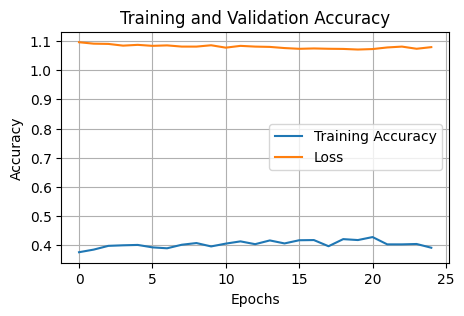

13/13 [==============================] - 3s 16ms/step


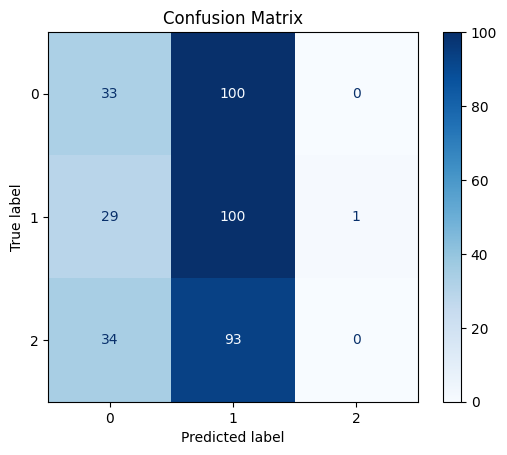

Epoch 1/25
49/49 [==============================] - 13s 86ms/step - loss: 1.0927 - accuracy: 0.4006
Epoch 2/25
49/49 [==============================] - 4s 88ms/step - loss: 1.0902 - accuracy: 0.3936
Epoch 3/25
49/49 [==============================] - 4s 87ms/step - loss: 1.0856 - accuracy: 0.3840
Epoch 4/25
49/49 [==============================] - 4s 88ms/step - loss: 1.0917 - accuracy: 0.3904
Epoch 5/25
49/49 [==============================] - 4s 89ms/step - loss: 1.0881 - accuracy: 0.3923
Epoch 6/25
49/49 [==============================] - 4s 87ms/step - loss: 1.0876 - accuracy: 0.4000
Epoch 7/25
49/49 [==============================] - 4s 89ms/step - loss: 1.0817 - accuracy: 0.3994
Epoch 8/25
49/49 [==============================] - 4s 88ms/step - loss: 1.0827 - accuracy: 0.4032
Epoch 9/25
49/49 [==============================] - 4s 88ms/step - loss: 1.0803 - accuracy: 0.4045
Epoch 10/25
49/49 [==============================] - 5s 93ms/step - loss: 1.0853 - accuracy: 0.3981
Epoch 11

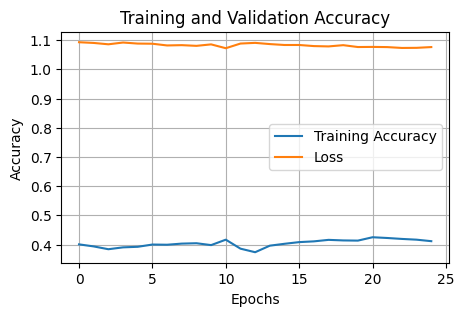

13/13 [==============================] - 3s 26ms/step


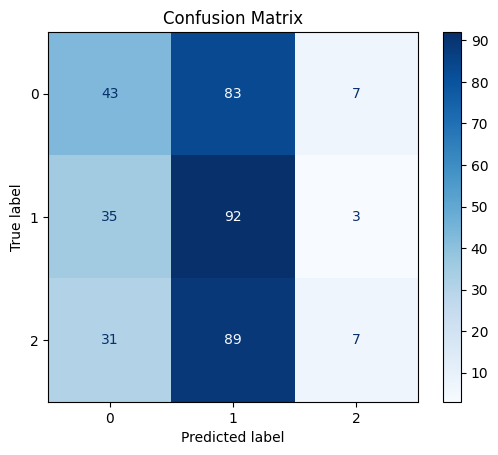

Epoch 1/25
23/23 [==============================] - 11s 22ms/step - loss: 1.1007 - accuracy: 0.3380
Epoch 2/25
23/23 [==============================] - 0s 21ms/step - loss: 1.0993 - accuracy: 0.3394
Epoch 3/25
23/23 [==============================] - 1s 22ms/step - loss: 1.0966 - accuracy: 0.3662
Epoch 4/25
23/23 [==============================] - 0s 22ms/step - loss: 1.0951 - accuracy: 0.3761
Epoch 5/25
23/23 [==============================] - 1s 23ms/step - loss: 1.0944 - accuracy: 0.3718
Epoch 6/25
23/23 [==============================] - 1s 26ms/step - loss: 1.0907 - accuracy: 0.3803
Epoch 7/25
23/23 [==============================] - 1s 23ms/step - loss: 1.0881 - accuracy: 0.4000
Epoch 8/25
23/23 [==============================] - 1s 22ms/step - loss: 1.0835 - accuracy: 0.3944
Epoch 9/25
23/23 [==============================] - 0s 21ms/step - loss: 1.0885 - accuracy: 0.3930
Epoch 10/25
23/23 [==============================] - 0s 20ms/step - loss: 1.0846 - accuracy: 0.4028
Epoch 11

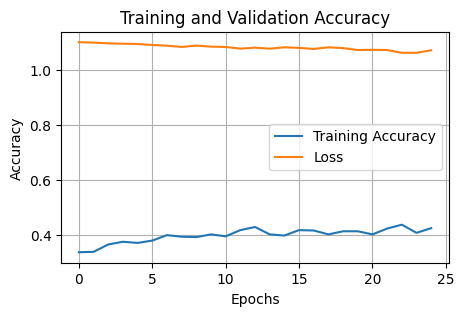

6/6 [==============================] - 2s 8ms/step


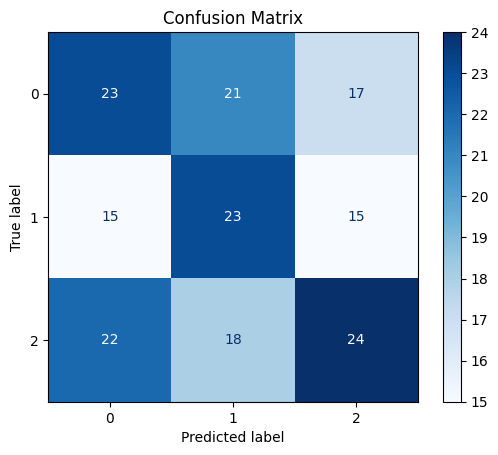

Epoch 1/25
23/23 [==============================] - 11s 50ms/step - loss: 1.1088 - accuracy: 0.3366
Epoch 2/25
23/23 [==============================] - 1s 53ms/step - loss: 1.0972 - accuracy: 0.3592
Epoch 3/25
23/23 [==============================] - 1s 49ms/step - loss: 1.1014 - accuracy: 0.3775
Epoch 4/25
23/23 [==============================] - 1s 53ms/step - loss: 1.0958 - accuracy: 0.3648
Epoch 5/25
23/23 [==============================] - 1s 51ms/step - loss: 1.0971 - accuracy: 0.3535
Epoch 6/25
23/23 [==============================] - 1s 48ms/step - loss: 1.0972 - accuracy: 0.3535
Epoch 7/25
23/23 [==============================] - 1s 49ms/step - loss: 1.0939 - accuracy: 0.3690
Epoch 8/25
23/23 [==============================] - 1s 55ms/step - loss: 1.0900 - accuracy: 0.3845
Epoch 9/25
23/23 [==============================] - 1s 53ms/step - loss: 1.0946 - accuracy: 0.3873
Epoch 10/25
23/23 [==============================] - 1s 46ms/step - loss: 1.0938 - accuracy: 0.3845
Epoch 11

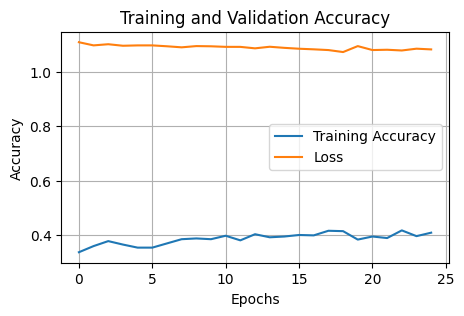

6/6 [==============================] - 3s 19ms/step


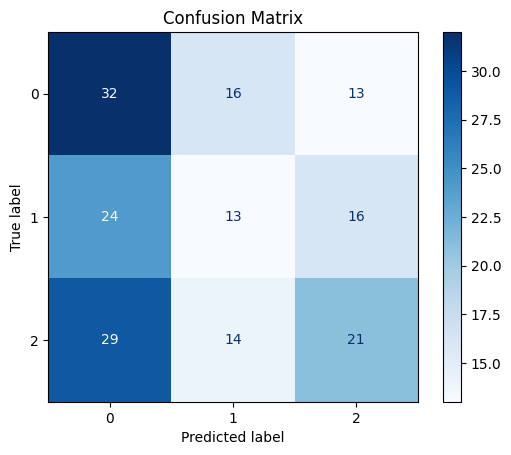

Epoch 1/25
23/23 [==============================] - 13s 82ms/step - loss: 1.1064 - accuracy: 0.3239
Epoch 2/25
23/23 [==============================] - 2s 84ms/step - loss: 1.0976 - accuracy: 0.3521
Epoch 3/25
23/23 [==============================] - 2s 84ms/step - loss: 1.0959 - accuracy: 0.3648
Epoch 4/25
23/23 [==============================] - 2s 86ms/step - loss: 1.0970 - accuracy: 0.3592
Epoch 5/25
23/23 [==============================] - 2s 84ms/step - loss: 1.0987 - accuracy: 0.3338
Epoch 6/25
23/23 [==============================] - 2s 82ms/step - loss: 1.0969 - accuracy: 0.3549
Epoch 7/25
23/23 [==============================] - 2s 85ms/step - loss: 1.0929 - accuracy: 0.3761
Epoch 8/25
23/23 [==============================] - 2s 82ms/step - loss: 1.0971 - accuracy: 0.3521
Epoch 9/25
23/23 [==============================] - 2s 84ms/step - loss: 1.0956 - accuracy: 0.3718
Epoch 10/25
23/23 [==============================] - 2s 82ms/step - loss: 1.0892 - accuracy: 0.3915
Epoch 11

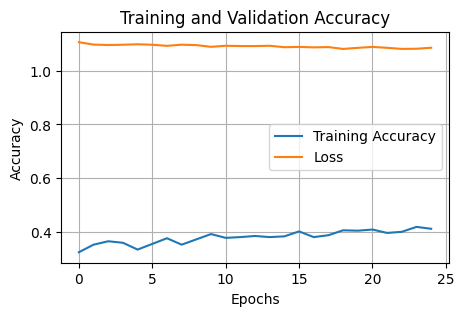

6/6 [==============================] - 2s 25ms/step


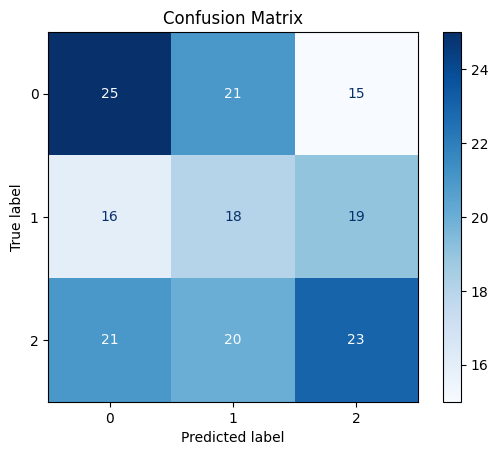

Epoch 1/25
8/8 [==============================] - 14s 24ms/step - loss: 1.0973 - accuracy: 0.3492
Epoch 2/25
8/8 [==============================] - 0s 20ms/step - loss: 1.0844 - accuracy: 0.3849
Epoch 3/25
8/8 [==============================] - 0s 20ms/step - loss: 1.0805 - accuracy: 0.4008
Epoch 4/25
8/8 [==============================] - 0s 22ms/step - loss: 1.0643 - accuracy: 0.4206
Epoch 5/25
8/8 [==============================] - 0s 21ms/step - loss: 1.0657 - accuracy: 0.4484
Epoch 6/25
8/8 [==============================] - 0s 24ms/step - loss: 1.0626 - accuracy: 0.4008
Epoch 7/25
8/8 [==============================] - 0s 19ms/step - loss: 1.0573 - accuracy: 0.4127
Epoch 8/25
8/8 [==============================] - 0s 22ms/step - loss: 1.0376 - accuracy: 0.4603
Epoch 9/25
8/8 [==============================] - 0s 23ms/step - loss: 1.0527 - accuracy: 0.4365
Epoch 10/25
8/8 [==============================] - 0s 22ms/step - loss: 1.0513 - accuracy: 0.4167
Epoch 11/25
8/8 [===========

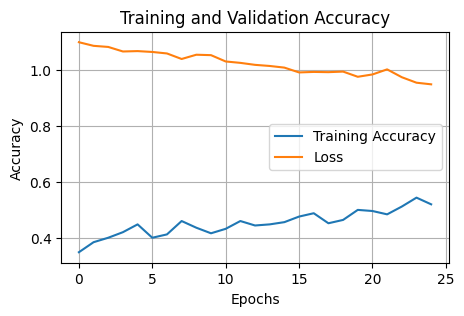

2/2 [==============================] - 2s 9ms/step


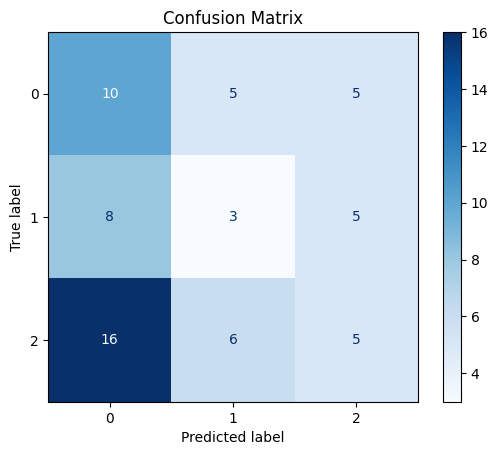

Epoch 1/25
8/8 [==============================] - 13s 53ms/step - loss: 1.1047 - accuracy: 0.3175
Epoch 2/25
8/8 [==============================] - 0s 60ms/step - loss: 1.0954 - accuracy: 0.3929
Epoch 3/25
8/8 [==============================] - 0s 56ms/step - loss: 1.0894 - accuracy: 0.3571
Epoch 4/25
8/8 [==============================] - 0s 52ms/step - loss: 1.0765 - accuracy: 0.3929
Epoch 5/25
8/8 [==============================] - 0s 53ms/step - loss: 1.0644 - accuracy: 0.4246
Epoch 6/25
8/8 [==============================] - 0s 49ms/step - loss: 1.0591 - accuracy: 0.4365
Epoch 7/25
8/8 [==============================] - 0s 52ms/step - loss: 1.0411 - accuracy: 0.4683
Epoch 8/25
8/8 [==============================] - 0s 50ms/step - loss: 1.0507 - accuracy: 0.4444
Epoch 9/25
8/8 [==============================] - 0s 52ms/step - loss: 1.0480 - accuracy: 0.4365
Epoch 10/25
8/8 [==============================] - 1s 65ms/step - loss: 1.0219 - accuracy: 0.4683
Epoch 11/25
8/8 [===========

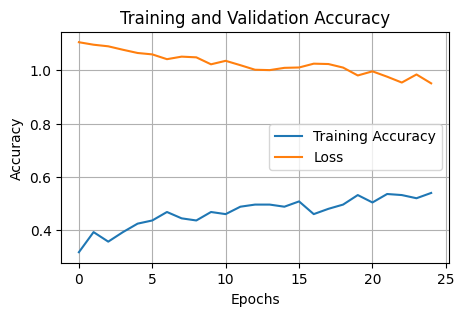

2/2 [==============================] - 2s 16ms/step


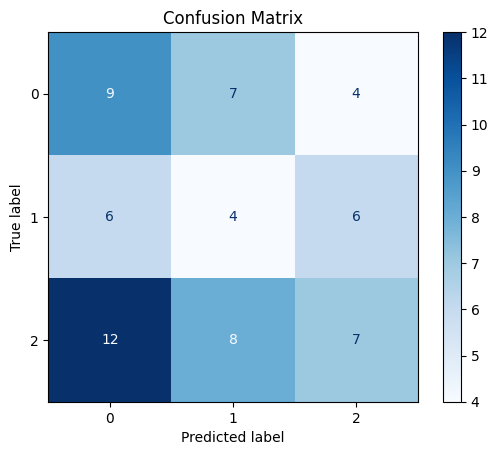

Epoch 1/25
8/8 [==============================] - 13s 98ms/step - loss: 1.1026 - accuracy: 0.3651
Epoch 2/25
8/8 [==============================] - 1s 97ms/step - loss: 1.0837 - accuracy: 0.3968
Epoch 3/25
8/8 [==============================] - 1s 91ms/step - loss: 1.0822 - accuracy: 0.3889
Epoch 4/25
8/8 [==============================] - 1s 96ms/step - loss: 1.0727 - accuracy: 0.4087
Epoch 5/25
8/8 [==============================] - 1s 95ms/step - loss: 1.0567 - accuracy: 0.4325
Epoch 6/25
8/8 [==============================] - 1s 93ms/step - loss: 1.0560 - accuracy: 0.4405
Epoch 7/25
8/8 [==============================] - 1s 88ms/step - loss: 1.0542 - accuracy: 0.4444
Epoch 8/25
8/8 [==============================] - 1s 88ms/step - loss: 1.0267 - accuracy: 0.4643
Epoch 9/25
8/8 [==============================] - 1s 96ms/step - loss: 1.0300 - accuracy: 0.4563
Epoch 10/25
8/8 [==============================] - 1s 94ms/step - loss: 1.0433 - accuracy: 0.4524
Epoch 11/25
8/8 [===========

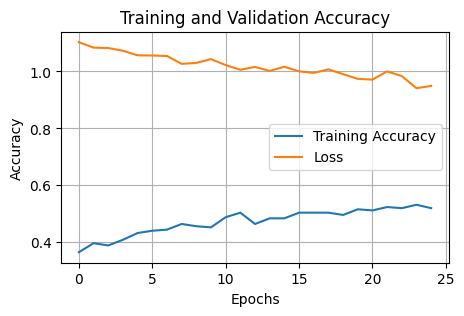

2/2 [==============================] - 2s 52ms/step


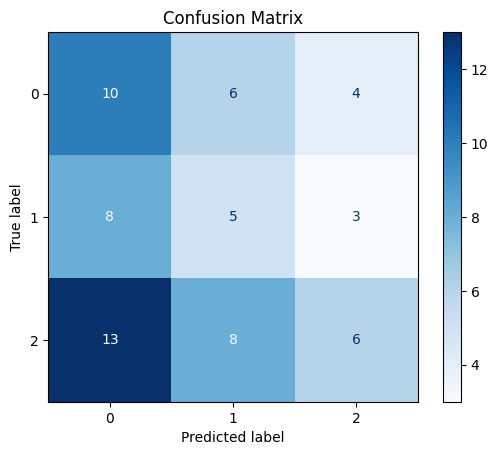

Epoch 1/25
56/56 [==============================] - 12s 21ms/step - loss: 1.0936 - accuracy: 0.3730
Epoch 2/25
56/56 [==============================] - 1s 25ms/step - loss: 1.0914 - accuracy: 0.3798
Epoch 3/25
56/56 [==============================] - 1s 20ms/step - loss: 1.0892 - accuracy: 0.3966
Epoch 4/25
56/56 [==============================] - 1s 21ms/step - loss: 1.0883 - accuracy: 0.3893
Epoch 5/25
56/56 [==============================] - 1s 22ms/step - loss: 1.0863 - accuracy: 0.3944
Epoch 6/25
56/56 [==============================] - 1s 21ms/step - loss: 1.0857 - accuracy: 0.3792
Epoch 7/25
56/56 [==============================] - 1s 20ms/step - loss: 1.0852 - accuracy: 0.3961
Epoch 8/25
56/56 [==============================] - 1s 23ms/step - loss: 1.0830 - accuracy: 0.3978
Epoch 9/25
56/56 [==============================] - 1s 22ms/step - loss: 1.0808 - accuracy: 0.4011
Epoch 10/25
56/56 [==============================] - 1s 20ms/step - loss: 1.0812 - accuracy: 0.3916
Epoch 11

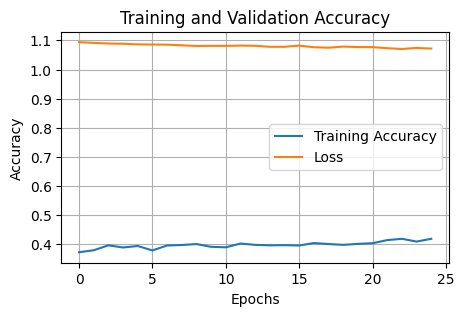

14/14 [==============================] - 2s 10ms/step


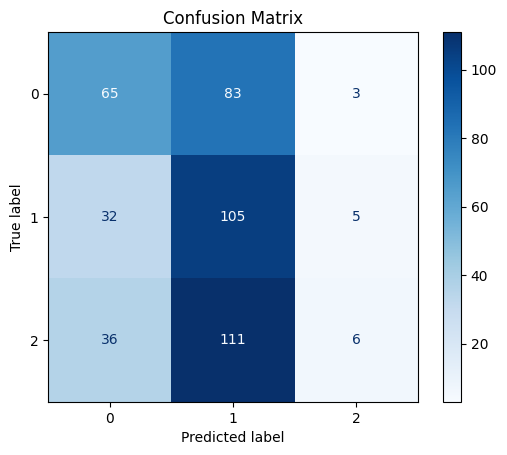

Epoch 1/25
56/56 [==============================] - 11s 49ms/step - loss: 1.0983 - accuracy: 0.3618
Epoch 2/25
56/56 [==============================] - 3s 49ms/step - loss: 1.0912 - accuracy: 0.3843
Epoch 3/25
56/56 [==============================] - 3s 46ms/step - loss: 1.0903 - accuracy: 0.3798
Epoch 4/25
56/56 [==============================] - 3s 48ms/step - loss: 1.0875 - accuracy: 0.3893
Epoch 5/25
56/56 [==============================] - 3s 48ms/step - loss: 1.0804 - accuracy: 0.3961
Epoch 6/25
56/56 [==============================] - 3s 46ms/step - loss: 1.0889 - accuracy: 0.3865
Epoch 7/25
56/56 [==============================] - 3s 49ms/step - loss: 1.0843 - accuracy: 0.3955
Epoch 8/25
56/56 [==============================] - 3s 47ms/step - loss: 1.0831 - accuracy: 0.3978
Epoch 9/25
56/56 [==============================] - 3s 47ms/step - loss: 1.0837 - accuracy: 0.3978
Epoch 10/25
56/56 [==============================] - 3s 48ms/step - loss: 1.0871 - accuracy: 0.3944
Epoch 11

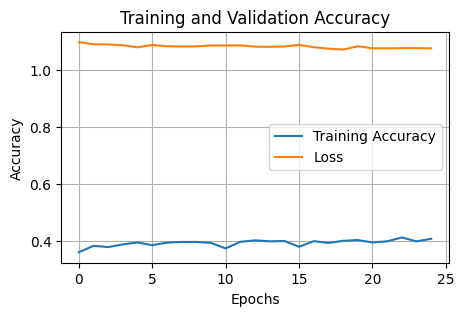

14/14 [==============================] - 4s 38ms/step


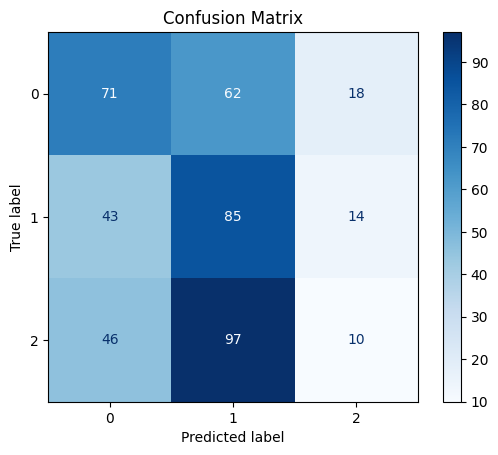

Epoch 1/25
56/56 [==============================] - 14s 91ms/step - loss: 1.1057 - accuracy: 0.3494
Epoch 2/25
56/56 [==============================] - 5s 92ms/step - loss: 1.0967 - accuracy: 0.3669
Epoch 3/25
56/56 [==============================] - 5s 93ms/step - loss: 1.0873 - accuracy: 0.4000
Epoch 4/25
56/56 [==============================] - 5s 92ms/step - loss: 1.0911 - accuracy: 0.3781
Epoch 5/25
56/56 [==============================] - 5s 91ms/step - loss: 1.0881 - accuracy: 0.3798
Epoch 6/25
56/56 [==============================] - 5s 91ms/step - loss: 1.0844 - accuracy: 0.3921
Epoch 7/25
56/56 [==============================] - 5s 94ms/step - loss: 1.0833 - accuracy: 0.3837
Epoch 8/25
56/56 [==============================] - 8s 149ms/step - loss: 1.0903 - accuracy: 0.3747
Epoch 9/25
56/56 [==============================] - 8s 147ms/step - loss: 1.0828 - accuracy: 0.3978
Epoch 10/25
56/56 [==============================] - 7s 122ms/step - loss: 1.0879 - accuracy: 0.3837
Epoch

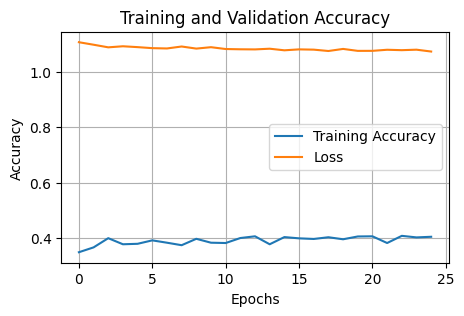

14/14 [==============================] - 3s 39ms/step


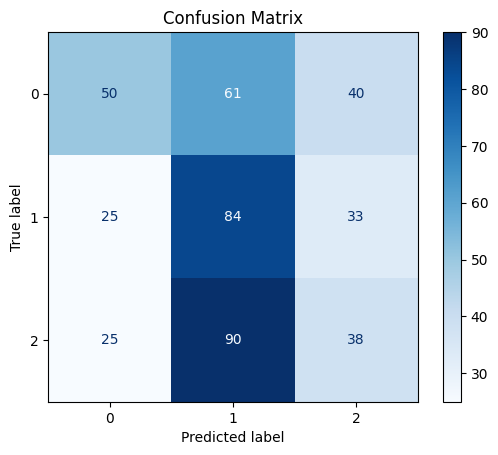

In [2]:
sequence_length = [5,15,30]
path = [
['Modified_Result_15m_1.csv','with_Indicator_15m_BTC_USDT.csv','15m'],
['Modified_Result_30m_1.csv','with_Indicator_30m_BTC_USDT.csv','30m'],
['Modified_Result_1h_1.csv','with_Indicator_1h_BTC_USDT.csv','1h'],
['Modified_Result_5m_1.csv','with_Indicator_5m_BTC_USDT.csv','5m']]
with open('training_results.csv', 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    
    # Write the header row to the CSV file
    csv_writer.writerow(['Path', 'Sequence Length', 'Epoch', 'Train Accuracy', 'Train Loss', 'Test Accuracy'])
    for i in range(4):
        for seq in sequence_length:
            X, y = pre_processing(path[i][0],path[i][1], seq)
            X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

            model = Sequential()
            model.add(LayerNormalization(input_shape=(X.shape[1], X.shape[2])))
            model.add(Bidirectional(LSTM(64, return_sequences=True)))
            model.add(Dropout(0.3))
            model.add(Bidirectional(LSTM(128, return_sequences=True)))
            model.add(Dropout(0.3))  # Regularization to prevent overfitting
            model.add(LSTM(32, return_sequences=False))
            model.add(Dropout(0.3))
            model.add(Dense(64, activation='relu'))  # Intermediate Dense layer
            model.add(Dense(32, activation='relu'))
            model.add(Dense(3, activation='softmax'))

            optimizer = Adam(learning_rate=0.001)
            model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            history = model.fit(X_train, y_train, epochs=25, batch_size=32)
            for epoch in range(len(history.history['accuracy'])):
                csv_writer.writerow([
                    path[i][2],  # Dataset identifier
                    seq,         # Sequence length
                    epoch + 1,   # Epoch number
                    history.history['accuracy'][epoch],  # Training accuracy
                    history.history['loss'][epoch],      # Training loss
                    # history.history.get('val_accuracy', [None])[epoch],  # Validation accuracy (if available)
                    # history.history.get('val_loss', [None])[epoch],      # Validation loss (if available)
                    None
                ])
            plt.figure(figsize=(5,3))
            plt.plot(history.history['accuracy'], label='Training Accuracy')
            plt.plot(history.history['loss'], label='Loss')
            plt.xlabel('Epochs')
            plt.ylabel('Accuracy')
            plt.title('Training and Validation Accuracy')
            plt.legend()
            plt.grid(True)
            plt.savefig(f'{path[i][2]}_{seq}_rnn_plot.png', dpi=300, bbox_inches='tight')
            plt.show()

            y_pred = model.predict(X_test)
            y_pred_classes = y_pred.argmax(axis=1)
            cm = confusion_matrix(y_test, y_pred_classes)
            test_accuracy = accuracy_score(y_test, y_pred_classes)
            csv_writer.writerow([
                    path[i][2],
                    seq,
                    'Final',
                    None,
                    None,
                    test_accuracy
                ])
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(3))
            disp.plot(cmap=plt.cm.Blues)
            plt.title("Confusion Matrix")
            plt.savefig(f'{path[i][2]}_{seq}_rnn_cm.png', dpi=300, bbox_inches="tight")
            plt.show()     

In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
unique_classes, counts = np.unique(y_train, return_counts=True)
print(unique_classes)
print(counts)
unique_classes, counts = np.unique(y_test, return_counts=True)
print(unique_classes)
print(counts)

(1780, 30, 10)
(446, 30, 10)
(1780,)
(446,)
[0 1 2]
[591 600 589]
[0 1 2]
[151 142 153]
